## Redukcja wymiarowości zmiennej niezależnej

In [42]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
ds = load_breast_cancer()
ds.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [29]:
print(ds.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [30]:
df = pd.DataFrame(ds.data, columns=ds.feature_names)
df.head(7)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


In [31]:
# import klasy odpowiedzialnej za PCA
from sklearn.decomposition import PCA

In [63]:
%%timeit -r 10 -n 100
N_DIM = 5
pca = PCA(n_components=N_DIM, random_state=0)
X_pca = pca.fit_transform(df)

5.96 ms ± 517 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [64]:
%%timeit -r 10 -n 100
N_DIM = 2
pca = PCA(n_components=N_DIM, random_state=0)
X_pca = pca.fit_transform(df)

6.25 ms ± 270 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [55]:
# redukcje wymiarowosci w oparciu o obiekt PCA
X_pca = pca.fit_transform(df)

In [56]:
X_pca.shape

(569, 2)

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [67]:
%%timeit -r 10 -n 100

# estymator na danych oryginalnych

X_train, X_test, y_train, y_test = train_test_split(df, ds.target, test_size=.2, random_state=0)
model = DecisionTreeClassifier(max_depth=7, random_state=0)
model.fit(X_train, y_train)
#print(model.score(X_test, y_test))
#pd.DataFrame(confusion_matrix(y_test, model.predict(X_test) ))      

13.7 ms ± 299 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [68]:
%%timeit -r 10 -n 100

# estymator na danych z PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca, ds.target, test_size=.2, random_state=0)
model = DecisionTreeClassifier(max_depth=7, random_state=0)
model.fit(X_train, y_train)
#print(model.score(X_test, y_test))
#pd.DataFrame(confusion_matrix(y_test, model.predict(X_test) )) 

2.44 ms ± 315 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


<AxesSubplot:>

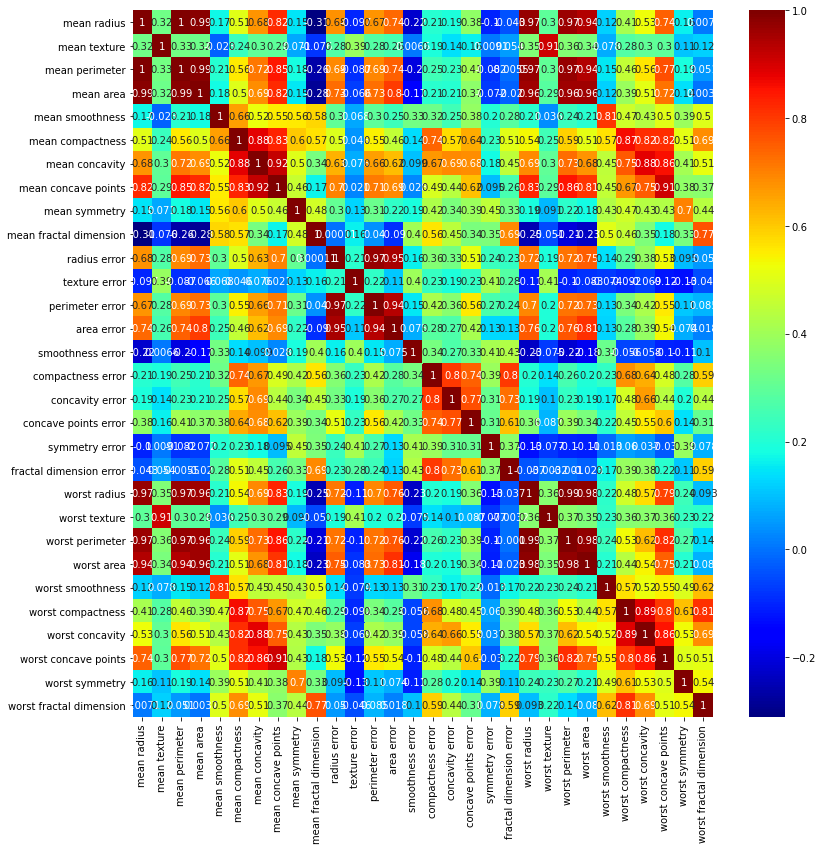

In [43]:
plt.figure(figsize=(13,13))
sns.heatmap(df.corr(), annot=True, cmap="jet")

<AxesSubplot:>

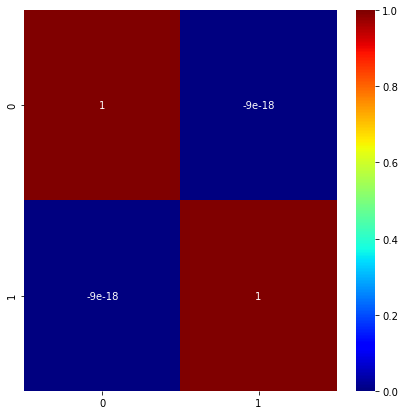

In [60]:
plt.figure(figsize=(7,7))
sns.heatmap(pd.DataFrame(X_pca).corr(), annot=True, cmap="jet")